In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import pickle
from sklearn import metrics, datasets, cluster
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import inquirer
from ipywidgets import interact

In [2]:
df1=pd.read_excel('ABBREV.xlsx')

In [3]:
df = df1
df = df.sample(n = 5000)
df.shape

(5000, 53)

# Filtered Dataframe

In [75]:
class filtered:
    df1 = df1.fillna(0)
    df_sugar_filtered = df1[df1['Sugar_Tot_(g)'] <= 25]
    df_sorted = df_sugar_filtered.sort_values('NDB_No', ascending=True)
filtered.df_sorted.shape

(7940, 53)

In [76]:
class dairy:
    df_dairy = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 1001]
    df_dairy = df_dairy[df_dairy['NDB_No'] < 1307]
dairy.df_dairy.shape

(236, 53)

In [77]:
class spices_n_herbs:
    df_snh = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 2000]
    df_snh = df_snh[df_snh['NDB_No'] < 2077]
spices_n_herbs.df_snh.shape

(64, 53)

In [78]:
class baby_foods:
    df_babyf = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 3000]
    df_babyf = df_babyf[df_babyf['NDB_No'] < 3713]
baby_foods.df_babyf.shape

(198, 53)

In [79]:
class inff_formula:#for baby foods
    df_inff = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 3800]
    df_inff = df_inff[df_inff['NDB_No'] < 4000]
inff_formula.df_inff.shape

(79, 53)

In [80]:
class fats_and_oils:
    df_fats = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 4000]
    df_fats = df_fats[df_fats['NDB_No'] < 4710]
fats_and_oils.df_fats.shape

(188, 53)

In [81]:
class poultry_products:
    df_poultry = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 5000]
    df_poultry = df_poultry[df_poultry['NDB_No'] < 5750]
poultry_products.df_poultry.shape

(382, 53)

In [82]:
class soups_sauces_gravies1:
    df_ssg = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 6000]
    df_ssg = df_ssg[df_ssg['NDB_No'] < 7000]
soups_sauces_gravies1.df_ssg.shape

(412, 53)

In [83]:
class processed_meats:
    df_meats = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 7000]
    df_meats = df_meats[df_meats['NDB_No'] < 7980]
processed_meats.df_meats.shape

(155, 53)

In [84]:
class grains:
    df_grains = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 8000]
    df_grains = df_grains[df_grains['NDB_No'] < 8713]
grains.df_grains.shape

(213, 53)

In [85]:
class fruits:
    df_fruits = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 9000]
    df_fruits = df_fruits[df_fruits['NDB_No'] < 9532]
fruits.df_fruits.shape

(324, 53)

In [86]:
class red_meats:
    df_red_meats = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 10000]
    df_red_meats = df_red_meats[df_red_meats['NDB_No'] < 10999]
red_meats.df_red_meats.shape

(336, 53)

In [87]:
class vegetables:
    df_vegetables = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 11000]
    df_vegetables = df_vegetables[df_vegetables['NDB_No'] < 11999]
vegetables.df_vegetables.shape

(779, 53)

In [88]:
class nuts_n_seeds:
    df_nutsnseeds = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 12000]
    df_nutsnseeds = df_nutsnseeds[df_nutsnseeds['NDB_No'] < 12739]
nuts_n_seeds.df_nutsnseeds.shape

(132, 53)

In [89]:
13-13986
class beef_products:
    df_beef_prod = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 13000]
    df_beef_prod = df_beef_prod[df_beef_prod['NDB_No'] < 13986]
beef_products.df_beef_prod.shape

(380, 53)

In [90]:
class beverages:
    df_beverages = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 14000]
    df_beverages = df_beverages[df_beverages['NDB_No'] < 14655]
beverages.df_beverages.shape

(323, 53)

In [91]:
class fish:
    df_fish = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 15000]
    df_fish = df_fish[df_fish['NDB_No'] < 15275]
fish.df_fish.shape

(259, 53)

In [92]:
class legumes:#and legume products
    df_legumes = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 16000]
    df_legumes = df_legumes[df_legumes['NDB_No'] < 16620]
legumes.df_legumes.shape

(356, 53)

In [93]:
class lamb_veal_game:#products
    df_lamb_veal_game = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 17000]
    df_lamb_veal_game = df_lamb_veal_game[df_lamb_veal_game['NDB_No'] < 17465]
lamb_veal_game.df_lamb_veal_game.shape

(464, 53)

In [94]:
class baked:#products
    df_baked = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 18000]
    df_baked = df_baked[df_baked['NDB_No'] < 19000]
baked.df_baked.shape

(370, 53)

In [95]:
class sweets:#products
    df_sweets = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 19000]
    df_sweets = df_sweets[df_sweets['NDB_No'] < 19925]
sweets.df_sweets.shape

(223, 53)

In [96]:
class whole_grain:#products
    df_whole_grain = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 20000]
    df_whole_grain = df_whole_grain[df_whole_grain['NDB_No'] < 20658]
whole_grain.df_whole_grain.shape

(180, 53)

In [97]:
class fast_foods:#products
    df_fast_food = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 21000]
    df_fast_food = df_fast_food[df_fast_food['NDB_No'] < 21612]
fast_foods.df_fast_food.shape

(356, 53)

In [98]:
class processed_foods:#products
    df_processed_foods = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 22110]
    df_processed_foods = df_processed_foods[df_processed_foods['NDB_No'] < 23661]
processed_foods.df_processed_foods.shape

(685, 53)

In [99]:
class snacks:#products
    df_snacks = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 25000]
    df_snacks = df_snacks[df_snacks['NDB_No'] < 25072]
snacks.df_snacks.shape

(32, 53)

In [100]:
class soups_sauces_gravies:#products
    df_soupsaucegravy = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 27000]
    df_soupsaucegravy = df_soupsaucegravy[df_soupsaucegravy['NDB_No'] < 27069]
soups_sauces_gravies.df_soupsaucegravy.shape

(46, 53)

In [101]:
class cookies:#products
    df_cookies = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 28000]
    df_cookies = df_cookies[df_cookies['NDB_No'] < 28400]
cookies.df_cookies.shape

(221, 53)

In [102]:
class vegetable:#products
    df_vegprod = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 31000]
    df_vegprod = df_vegprod[df_vegprod['NDB_No'] < 31037]
vegetable.df_vegprod.shape

(33, 53)

In [103]:
class starchy_food:#products
    df_starchy = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 32000]
    df_starchy = df_starchy[df_starchy['NDB_No'] < 32037]
starchy_food.df_starchy.shape

(36, 53)

In [104]:
class inf_formula:#inf stands for formerly infection formula
    df_inf = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 33862]
    df_inf = df_inf[df_inf['NDB_No'] < 33880]
inf_formula.df_inf.shape

(7, 53)

In [105]:
class aioranf:#aioranf stands for American Indian/Alaska Native Foods
    df_aioranf = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 35000]
    df_aioranf = df_aioranf[df_aioranf['NDB_No'] < 35241]
aioranf.df_aioranf.shape

(164, 53)

In [106]:
class restaurant:#foods
    df_res = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 36000]
    df_res = df_res[df_res['NDB_No'] < 36634]
restaurant.df_res.shape

(109, 53)

In [107]:
class sweets2:#foods
    df_sweets2 = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 42040]
    df_sweets2 = df_sweets2[df_sweets2['NDB_No'] < 42317]
sweets2.df_sweets2.shape

(63, 53)

In [108]:
class desserts:#foods
    df_dessert = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 43000]
    df_dessert = df_dessert[df_dessert['NDB_No'] < 43599]
desserts.df_dessert.shape

(121, 53)

In [109]:
class dietary_lipids:#foods
    df_dlipids = filtered.df_sorted[filtered.df_sorted['NDB_No'] >= 44000]
    df_dlipids = df_dlipids[df_dlipids['NDB_No'] < 44261]
dietary_lipids.df_dlipids.shape

(8, 53)

In [110]:
class hppbma:#high protein plant-based meal alternative
    df_hppbma = filtered.df_sorted[filtered.df_sorted['NDB_No'] == 48052]
hppbma.df_hppbma.shape

(1, 53)

# Trying pickle

In [15]:
pickle.dump(df1, open('example.pkl','wb'))

In [5]:
unpickled = pickle.load(open('example.pkl', 'rb'))

In [28]:
ex = unpickled[unpickled['Shrt_Desc'].str.contains('cereal', case=False)]
ex

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
2099,8692,"CEREALS,QUAKER,OATMEAL,REAL MEDLEYS,PEACH ALMO...",8.10,387,10.10,9.84,3.35,68.61,7.4,24.85,...,NaN,1.114,5.242,2.641,0.0,75.0,"1 package, (1 NLEA serving)",NaN,NaN,0.0
1886,8206,"CEREALS RTE,MALT-O-MEAL,COCO-ROOS",2.50,389,3.41,4.61,2.73,86.75,3.3,48.11,...,0.0,2.570,0.887,0.555,0.0,30.0,".75 cup, (1 NLEA serving)",NaN,NaN,0.0
1791,8029,"CEREALS RTE,POST BRAN FLAKES",3.40,328,9.90,2.10,4.10,80.50,18.3,18.60,...,1.4,0.400,0.300,1.200,0.0,30.0,".75 cup, (1 NLEA serving)",NaN,NaN,0.0
1851,8128,"CEREALS,OATS,INST,FORT,W/ CINN & SPICE,DRY",6.92,369,9.53,4.84,2.63,76.08,8.0,25.33,...,1.9,0.768,1.487,1.696,0.0,45.0,1 packet,NaN,NaN,0.0
8607,42236,"CEREALS RTE,FRSTD OAT CRL W/MARSHMALLOWS",2.80,400,7.10,3.33,2.27,84.70,4.3,36.13,...,1.4,0.620,1.100,1.280,0.0,30.0,".75 cup, (1 NLEA serving)",NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,8662,"CEREALS RTE,POST,HONEY BUNCHES OF OATS,W/ REAL...",2.90,399,6.70,4.90,2.20,83.30,5.4,24.00,...,NaN,0.600,2.500,1.500,0.0,31.0,".75 cup, (1 NLEA serving)",NaN,NaN,0.0
2013,8574,"CEREALS,CRM OF WHT,2 1/2 MIN CK,CKD W/H2O,STOV...",86.20,56,1.44,0.20,0.42,11.74,0.7,0.07,...,0.0,0.051,0.030,0.102,NaN,244.0,1 cup,NaN,NaN,0.0
1789,8025,"CEREALS RTE,RALSTON CRISP RICE",3.62,394,6.69,1.26,2.22,86.22,0.7,12.12,...,0.0,0.360,0.243,0.293,0.0,33.0,"1.25 cup, (1 NLEA serving)",28.0,1 cup,0.0
2101,8694,"CEREALS,QUAKER,INST OATMEAL,WEIGHT CONTROL,CINN",9.09,361,16.50,6.28,3.93,64.21,13.0,1.27,...,NaN,1.207,2.224,1.839,1.0,45.0,"1 packet, (1 NLEA serving)",NaN,NaN,0.0


# Example Flow & Explanation

In [ ]:
#Let's say this is the user's input in our super-admin page
x0 = 'Champorado'
x01 = '8790'
x1 = '4.56'
x2 = '394'
x3 = '10.99'
x4 = '6.36'
x5 = '4.60'
x6 = '73.48'

In [ ]:
#Let's limit only our columns first since our input conists of 6 only
example_df = df1[['NDB_No','Water_(g)',
'Energ_Kcal','Protein_(g)','Lipid_Tot_(g)',
'Ash_(g)','Carbohydrt_(g)']]
example_df.tail()
#our input will be added in our dataframe inside of these 
# columns presented below

In [ ]:
#we will now add our input to the dataframe
new = ['0',x1,x2,x3,x4,x5,x6]
new2 = ['0',x0,x1,x2,x3,x4,x5,x6]

df1 = df1.append(pd.Series(new2, index=df1.columns[:len(new2)]), ignore_index=True)
example_df = example_df.append(pd.Series(new, index=example_df.columns[:len(new)]), ignore_index=True)
#our input is now added to our original dataframe and to what dataframe we are using
#you might be wondering about 2 variables and 2 appends, 
# df1 is our original DF and example_df is what we are currently using
#we added the input in our original DF because what we just want 
# to see here is what cluster will this food be included
print(example_df.shape)
print(df1.shape)

In [ ]:
example_df = example_df.fillna(0) 
#we will all the NaN or null values inside our 
#dataframe if the input consists of null data it will now be 0
example_df.isnull().sum() 
#check if there is still NaN in our DF

In [ ]:
ex = StandardScaler().fit_transform(example_df)
ex

In [ ]:
kmeans = KMeans(n_clusters=4) 

# fit kmeans object to data
kmeans.fit(ex)

In [ ]:
y_predicted = kmeans.fit_predict(example_df)
print(y_predicted)

In [ ]:
example_df['cluster']=y_predicted
example_df.head()

In [ ]:
#merge here
example_df = example_df[['NDB_No','cluster']]
example_df = pd.merge(df1, example_df)
example_df.tail()

# Finalization

In [21]:
class example_class:
    example_df = df[['NDB_No','Water_(g)','Energ_Kcal',
    'Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)']]

    max = int(example_df.iloc[-1]['NDB_No'])

    foodId = max+1
    food_name = input("Food name: ")
    data1 = int(input("Nutrient 1: "))
    data2 = int(input("Nutrient 2: "))
    data3 = int(input("Nutrient 3: "))
    data4 = int(input("Nutrient 4: "))
    data5 = int(input("Nutrient 5: "))
    data6 = int(input("Nutrient 6: "))
    answer = input("What food are you looking for?")

    users_inputdf1 = [foodId,food_name,data1,data2,data3,data4,data5,data6]
    users_inputex = [foodId,data1,data2,data3,data4,data5,data6]

    example_df = example_df.append(pd.Series(users_inputex, 
    index=example_df.columns[:len(users_inputex)]), ignore_index=True)
    df1 = df.append(pd.Series(users_inputdf1, 
    index=df.columns[:len(users_inputdf1)]), ignore_index=True)
    #example_df.concat((example_df,users_inputex), axis=0)
    
    example_df = example_df.fillna(0)

    ex = StandardScaler().fit_transform(example_df)

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(ex)
    KMeans(n_clusters=4)

    y_predict = kmeans.fit_predict(example_df)
    example_df['cluster'] = y_predict
    example_df = example_df[['NDB_No','cluster']]
    example_df = pd.merge(df1, example_df)

    source = example_df[example_df['NDB_No'] == foodId]
    final_food_name = source.iloc[-1]['Shrt_Desc']
    cluster = source.iloc[-1]['cluster']
    final_foodId = source.iloc[-1]['NDB_No']
    rer = example_df[example_df['cluster'] == cluster]
    rer = rer[rer['Shrt_Desc'].str.contains(answer, case=False)]

    print("Food name is '",final_food_name,"' with food id of '",final_foodId,
    "' and your cluster is in cluster '",cluster,"'")
    print("Your are looking for ", answer, " so here's the list for you")
    print(rer)

Food name is ' Sampaloc ' with food id of ' 14197 ' and your cluster is in cluster ' 1 '
Your are looking for  yogurt  so here's the list for you
      NDB_No                                      Shrt_Desc  Water_(g)  \
1715   16251  SILK VANILLA SOY YOGURT (SINGLE SERVING SIZE)      79.35   
2578   16253                     SILK STRAWBERRY SOY YOGURT      77.00   
2894   16252                            SILK PLN SOY YOGURT      84.67   
3649   16256                   SILK BLACK CHERRY SOY YOGURT      78.18   
3787   16254                      SILK RASPBERRY SOY YOGURT      77.59   

      Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  \
1715          88         2.94           1.76     1.24           14.71   
2578          94         2.35           1.18     1.24           18.24   
2894          66         2.64           1.76     1.24            9.69   
3649          88         2.35           1.18     1.24           17.06   
3787          88         2.35           1.18

C:\Users\User\AppData\Local\Temp\ipykernel_14792\1967472145.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  example_df = example_df.append(pd.Series(users_inputex,
C:\Users\User\AppData\Local\Temp\ipykernel_14792\1967472145.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df.append(pd.Series(users_inputdf1,


In [175]:
example_class.example_df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
4996,13384,"BEEF,CHUCK,UNDER BLADE POT RST,BNLESS,LN,0"" FA...",58.79,216,30.68,9.44,1.58,0.0,0.0,0.00,...,3.487,4.164,0.520,102.0,85.0,3 oz,629.0,1 roast,23.0,2
4997,19328,"CANDIES,MARS SNACKFOOD US,COCOAVIA CRISPY CHOC...",1.9,517,8.21,26.23,1.6,62.06,7.8,34.96,...,14.007,NaN,NaN,0.0,20.0,"1 serving, 0.7 oz bar",NaN,NaN,0.0,0
4998,17075,"LAMB,NZ,IMP,FRZ,LEG,WHL (SHK&SIRL),LN,CKD,RSTD",63.92,181,27.68,7.01,1.52,0.0,0.0,NaN,...,3.050,2.750,0.410,100.0,85.0,3 oz,218.0,"1 piece, cooked, excluding refuse (yield from ...",36.0,2
4999,22906,"CHICKEN POT PIE,FRZ ENTREE,PREP",62.58,204,5.11,11.85,1.25,19.21,1.1,2.26,...,4.365,3.613,3.302,15.0,302.0,1 pie,NaN,NaN,0.0,0
5000,22907,ryko,2,3,2,4,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


**Trial and error section**

In [184]:
class predict:
    #data = [2,2,2,2,2,2,4]
    data = example_class.kmeans.predict([[3,6,9,12,15,18,21]])
    
    print(int(data))

1


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [46]:
#trying concat with series
class wiwiwi:
    df = df1[['NDB_No','Water_(g)','Energ_Kcal',
    'Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)']]
    dff = pd.DataFrame([1,1,1,1,1,2,3])
    dd = pd.concat([df,dff], axis=0, ignore_index=True)
#wiwiwi.dd.tail()
wiwiwi.dd.tail()


,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),0
8792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
#di nagamit
pickle.dump(example_class, open('example.pkl','wb'))

In [ ]:
#print(example_df.tail())
#print(example_df.shape)
print(df1.shape)
df1.tail()

In [ ]:
example = {'id':['10002','10003','10004'],
'value':['23232323232323', 'ggg', 'asdasdas']}
example = pd.DataFrame(example)

#data1 = int(input("Nutrient 1: "))
#data2 = input("Nutrient 1: ")

users_inputdf1 = [data1,data2]
example = example.append(pd.Series(users_inputdf1, 
index=example.columns[:len(users_inputdf1)]), ignore_index=True)

max = int(example.iloc[-1]['id'])
max = max+1
max

#max_id = 10002
##example['id'] = (max_id + 1, max_id + len(example)+1)

#example = pd.DataFrame(df1)
#x = (max_id + 1, max_id + len(example) + 1)


# Pre-processing and Evaluation

C:\Users\User\AppData\Local\Temp\ipykernel_44160\3742223225.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


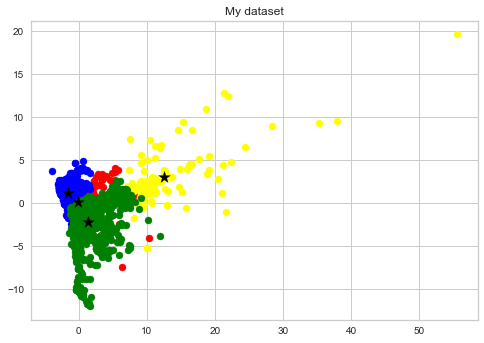

Cluster number 2 Score 0.6215935271156097
Cluster number 3 Score 0.24104484057272738
Cluster number 4 Score 0.15539898538609975
Cluster number 5 Score 0.1657497894377143
Cluster number 6 Score 0.18541261483837193


In [133]:
#overall code in preprocessing
class preprocess:
    df = df.fillna(df.median())
    df = df.fillna('No Data')

    le = LabelEncoder()
    df['GmWt_Desc2'] = le.fit_transform(df['GmWt_Desc2'])
    df['GmWt_Desc1'] = le.fit_transform(df['GmWt_Desc1'])

    #in_max_scaler = MinMaxScaler()
    in_standard_scaler = StandardScaler()
    feature = ['Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']
    #msc = in_max_scaler.fit_transform(df[feature])
    ssc = in_standard_scaler.fit_transform(df[feature])
    
    pca = PCA(n_components=0.95)
    numpy_arr = pca.fit_transform(ssc)
    sspca = pd.DataFrame(data=numpy_arr.flatten())
    
    kmeans = KMeans(n_clusters=4, random_state=2)
    #dsd = df[feature]
    kmeans.fit(numpy_arr)
    #sss = pd.DataFrame(df[feature]).to_numpy()
    #plt.scatter(sss[:,0], sss[:,1])
    clusters = kmeans.cluster_centers_
    y_km = kmeans.fit_predict(numpy_arr)
        
    plt.scatter(numpy_arr[y_km == 0,0], numpy_arr[y_km == 0,1], s=50, color='red')
    plt.scatter(numpy_arr[y_km == 1,0], numpy_arr[y_km == 1,1], s=50, color='blue')
    plt.scatter(numpy_arr[y_km == 2,0], numpy_arr[y_km == 2,1], s=50, color='yellow')
    plt.scatter(numpy_arr[y_km == 3,0], numpy_arr[y_km == 3,1], s=50, color='green')

    plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=150, color='black')
    plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=150, color='black')
    plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=150, color='black')
    plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=150, color='black')
    plt.title('My dataset')
    plt.show()
    
class silhouette:
    no_of_clusters = [2,3,4,5,6]
    for n_clusters in no_of_clusters:
        cluster = KMeans(n_clusters = n_clusters)
        cluster_labels = cluster.fit_predict(preprocess.numpy_arr)
        silhouette_avg = silhouette_score(preprocess.numpy_arr, cluster_labels)

        print("Cluster number", n_clusters, "Score", silhouette_avg)

*5/7 repeatition with 5000 samples, cluster 4 is consistent in rounded value of 0.11 - 0.24 which is close and near to 0. Therefore cluster number 4 is also a good choice in choosing for a value of K*

In [148]:
#standard dev per cluster
class standard_deviation:
    for i in range(4):
        print(np.std(preprocess.numpy_arr[preprocess.y_km==i], axis=0))

[0.9057703  0.96495689 0.92966044 0.93362136 0.59887011 0.55381853
 0.76143424 0.65931489 0.50962674 0.83601025 0.41774002 1.31095721
 1.04625919 0.51317188 0.52466394 0.79716244 0.76945591 0.8873252
 1.19392574 0.94981655 1.04288226 0.76085424 0.98242607 0.66392539
 0.55543225 0.73077648 0.52776016 0.93094473 0.76048415 0.4936707
 0.417377   0.54671456 0.31174951]
[0.72422175 0.7797817  0.43153962 1.03152807 0.8697507  1.20499611
 0.51181568 0.491972   0.79896528 0.68301109 1.19409686 0.76379589
 0.89243477 0.59977552 1.09264979 0.88323297 0.64186125 0.68923064
 0.47605667 0.89663766 0.54028854 0.46963399 0.48901545 0.50474738
 0.43256786 0.48438405 0.78797761 0.29471323 0.53629747 0.3736841
 0.29824978 0.25173209 0.30127848]
[ 6.63635949  3.24810937 10.50214813  6.64726378  6.61902861  5.20188108
  6.69889182  4.67471777  3.97015293  5.14094249  4.21117722  3.22718875
  2.55787313  2.96656637  1.81495976  3.49928669  4.16913546  3.93107479
  2.7664256   1.47989236  1.76743163  3.2619

In [171]:
#checking for pca's df
class pca_df:
    print(preprocess.numpy_arr.shape)
    numpy_arr = pd.DataFrame(preprocess.numpy_arr)
    #print(numpy_arr.head())
    numpy_arr.rename(columns = {0:'NDB'}, inplace=True)
    print(numpy_arr.columns)

(5000, 33)
Index(['NDB',     1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
          30,    31,    32],
      dtype='object')


In [185]:
original = pd.read_excel('ABBREV.xlsx')

In [186]:
print(original.shape)
#get only 1000 samples for this trial
original = original.sample(n = 1000)
print(original.shape)

(8790, 53)
(1000, 53)


In [187]:
#from string to integer
le = LabelEncoder()
original['GmWt_Desc2'] = le.fit_transform(original['GmWt_Desc2'])
original['GmWt_Desc1'] = le.fit_transform(original['GmWt_Desc1'])

In [188]:
original.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [200]:
feature = ['Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']

nutrientsDf = original[feature]

In [201]:
nutrientsDf.isnull().sum()

Water_(g)              0
Energ_Kcal             0
Protein_(g)            0
Lipid_Tot_(g)          0
Ash_(g)               40
Carbohydrt_(g)         0
Fiber_TD_(g)          57
Sugar_Tot_(g)        204
Calcium_(mg)          37
Iron_(mg)             15
Magnesium_(mg)        81
Phosphorus_(mg)       64
Potassium_(mg)        43
Sodium_(mg)            8
Zinc_(mg)             77
Copper_mg)           143
Manganese_(mg)       245
Selenium_(µg)        186
Vit_C_(mg)            88
Thiamin_(mg)          71
Riboflavin_(mg)       69
Niacin_(mg)           73
Panto_Acid_mg)       253
Vit_B6_(mg)           96
Folate_Tot_(µg)      137
Folic_Acid_(µg)      220
Food_Folate_(µg)     193
Folate_DFE_(µg)      221
Choline_Tot_ (mg)    453
Vit_B12_(µg)         131
Vit_A_IU              81
Vit_A_RAE            168
Retinol_(µg)         202
Alpha_Carot_(µg)     364
Beta_Carot_(µg)      345
Beta_Crypt_(µg)      364
Lycopene_(µg)        365
Lut+Zea_ (µg)        368
Vit_E_(mg)           333
Vit_D_µg             357


In [202]:
nutrientsDF = nutrientsDf.fillna(nutrientsDf.median())
nutrientsDF.isnull().sum()

Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg)           0
FA_Sat_(g)           0
FA_Mono_(g)

In [203]:
standardScaledX = StandardScaler().fit_transform(nutrientsDF)
standardScaledX

array([[ 0.73409781, -0.76254513,  0.42738716, ..., -0.15858002,
         0.8322779 ,  1.93570409],
       [ 0.8548713 , -0.7508823 ,  0.06564094, ..., -0.15858002,
         0.8322779 , -0.39867934],
       [-0.90066912,  0.25212128, -1.069059  , ..., -0.15858002,
         0.8322779 , -0.39867934],
       ...,
       [ 0.04757899, -0.07443803,  1.24883232, ..., -0.15858002,
         0.8322779 , -0.39867934],
       [-0.32819636,  0.08301021, -0.69955415, ..., -0.15858002,
         0.8322779 , -0.39867934],
       [ 0.09595246,  0.17631287,  1.53105256, ..., -0.12049576,
        -1.68782656,  1.5188499 ]])

In [204]:
pca = PCA(n_components=0.95)
standardScaledX = pca.fit_transform(standardScaledX)
sspca = pd.DataFrame(data=standardScaledX.flatten())

**Algorithm**

In [205]:
#from kmodes.kmodes import KModes
kmeans = KMeans(n_clusters=4, random_state=0).fit(standardScaledX)

In [206]:
centers = kmeans.cluster_centers_
centers

array([[-1.08863598e+00,  6.84140341e-01,  3.94133627e-01,
        -2.89298596e-01, -2.07277437e-01,  2.37740887e-01,
         6.83260192e-04, -1.48245650e-01, -5.44958711e-02,
         7.08178852e-02, -1.10531482e-02, -5.44188853e-02,
         3.01420903e-02, -4.56941948e-02, -1.32459533e-02,
         1.23734865e-03,  1.98388502e-02, -1.00779682e-02,
        -3.66037680e-02,  1.44814776e-03,  1.45923181e-02,
         9.50237710e-03, -6.30058534e-03, -2.91961237e-02,
        -9.73462468e-03, -3.37597614e-02, -1.32173344e-02,
         1.19668072e-02, -4.28350343e-03,  1.74182073e-02,
         1.34392266e-02, -1.46272620e-02],
       [ 1.41658105e+00, -2.01220726e+00, -8.41263861e-01,
         8.73919922e-01,  2.54404614e-01, -6.93458888e-01,
         4.16705931e-03,  3.61398564e-01,  1.43438965e-01,
        -2.19719475e-01, -1.67941490e-02,  1.96454184e-01,
        -1.33962396e-01,  1.63240121e-01,  5.73500102e-02,
         5.08030106e-02, -2.02322744e-02,  3.33223826e-02,
         8.70

In [207]:
y_predict = kmeans.fit_predict(standardScaledX)
y_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1,
       3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [208]:
nutrientsDF['cluster'] = y_predict
nutrientsDF.head()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
2696,77.03,95,15.43,3.48,3.49,0.67,0.0,0.670,7.0,1.13,...,1.227,1.5750,0.379,53.0,85.00,209,157.5,233,28.0,0
8311,80.80,97,11.70,5.30,1.50,0.00,0.8,1.675,12.0,0.40,...,1.471,1.9735,0.700,2.0,85.00,224,157.5,233,0.0,0
8787,26.00,269,0.00,0.00,0.86,73.14,0.0,73.200,13.0,3.60,...,0.000,0.0000,0.000,0.0,21.00,140,157.5,233,0.0,1
5375,77.45,108,19.28,2.83,1.05,0.00,0.8,1.675,20.0,0.76,...,0.738,0.9820,0.334,75.0,28.35,104,453.6,101,30.0,0
1068,43.76,406,17.66,37.24,1.70,0.11,0.0,0.110,25.0,0.98,...,9.994,16.7930,5.423,141.0,28.35,104,157.5,233,0.0,1


Text(0.5, 1.0, 'Standard Scaled X')

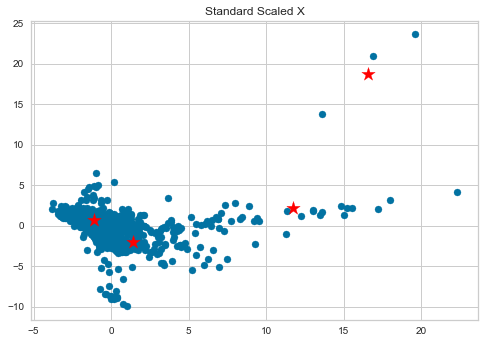

In [210]:
plt.scatter(standardScaledX[:,0], standardScaledX[:,1])
plt.scatter(centers[:,0], centers[:,1], s=200, color="red", marker="*")
plt.title("Standard Scaled X")

Text(0.5, 1.0, 'Colored Clusters')

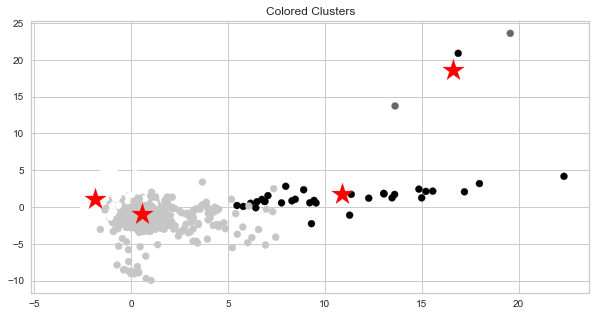

In [211]:
from sklearn import cluster
cl = cluster.KMeans(n_clusters=4)
cl.fit(standardScaledX)
plt.figure(figsize=(10,5))
plt.scatter(standardScaledX[:,0], standardScaledX[:,1], 
            c=cl.predict(standardScaledX))
plt.scatter(cl.cluster_centers_[:,0],
            cl.cluster_centers_[:,1], s=500, color="red", marker="*")
plt.title("Colored Clusters")

In [221]:
no_of_clusters = [2,3,4,5,6]
for n_clusters in no_of_clusters:
   cluster = KMeans(n_clusters = n_clusters)
   cluster_labels = cluster.fit_predict(standardScaledX)
   silhouette_avg = silhouette_score(standardScaledX, cluster_labels)

   #print process
   print("Cluster number", n_clusters, 
          "Score", silhouette_avg)

Cluster number 2 Score 0.6053522845305674
Cluster number 3 Score 0.12341908469119622
Cluster number 4 Score 0.12375902277253334
Cluster number 5 Score 0.15853785675826776
Cluster number 6 Score 0.15593220212357345


*5/8 repeatitions with 1000 samples, cluster 4 is consistent in rounded value of 0.11 - 0.18 which is close and near to 0. Therefore cluster number 4 is also a good choice in choosing for a value of K*

# Sample

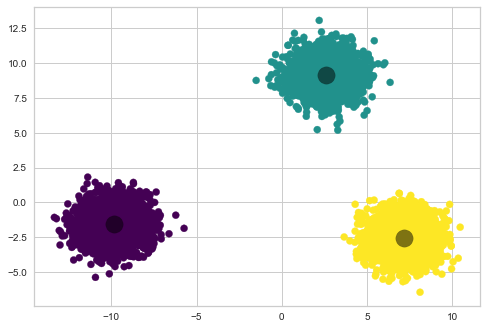

In [193]:
K = 3
X, y_true = make_blobs(n_samples=8790, random_state=32, n_features=53)
k_means = KMeans(K)
k_means.fit(X)

cluster_centres = k_means.cluster_centers_

y_kmeans = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

for centroid in cluster_centres:
    plt.scatter(centroid[0],  centroid[1], s=300,  c='black', alpha=0.5)